In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib as mpl
%matplotlib inline

from photutils import aperture_photometry
from photutils import CircularAperture, EllipticalAperture, RectangularAperture
from photutils.utils import calc_total_error

import matplotlib.patches as patches

In [5]:
path1 = 'C:/Users/Lisa/Dropbox/CoRoT-2b/Spitzer/r57958144/ch2/bcd/SPITZER_I2_57958144_0000_0000_1_bcd.fits'
path2 = 'C:/Users/Lisa/Documents/Exoplanets/High_Precision_Photometry/Modified_Data/Companion_subtracted/SPITZER_I2_57958144_0000_0000'
path3 = 'C:/Users/Lisa/Documents/Exoplanets/High_Precision_Photometry/Modified_Data/Oversampled/SPITZER_I2_57958144_0000_0000'
path4 = 'C:/Users/Lisa/Documents/Exoplanets/high_precision_photometry/Modified_Data/Oversampled_Companion_subtracted/SPITZER_I2_57958144_0000_0000'

hdu_list = fits.open(path1)
data1 = hdu_list[0].data
convfact = hdu_list[0].header['GAIN']*hdu_list[0].header['EXPTIME']/hdu_list[0].header['FLUXCONV']
data1 = convfact*data1
data2 = np.load(path2)
data3 = np.load(path3)
data4 = np.load(path4)

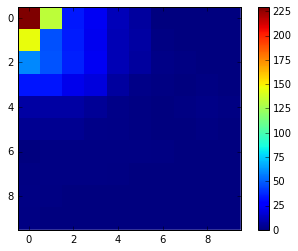

In [6]:
plt.figure()
plt.imshow(data4[0, 30:40, 30:40]*0.029691810510039204*4, interpolation = 'none', vmin = 0, vmax = 230)
plt.colorbar()

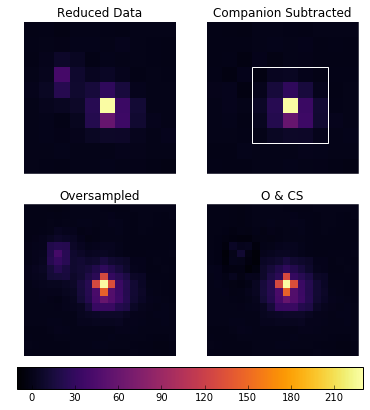

In [9]:
fig, axes = plt.subplots(nrows =2, ncols =2, figsize = (6,6))

rect = patches.Rectangle((2.5,2.5), 5, 5, linewidth=1, edgecolor = 'w', facecolor='none')

im = axes[0,0].imshow(data1[0, 10:20, 10:20]*0.029691810510039204, interpolation='none', cmap = 'inferno', vmin = -10, vmax = 230)
axes[0,1].imshow(data2[0, 10:20, 10:20]*0.029691810510039204, interpolation='none', cmap = 'inferno', vmin = -10, vmax = 230)
axes[1,0].imshow(data3[0, 20:40, 20:40]*0.029691810510039204*4, interpolation='none', cmap = 'inferno', vmin = -10, vmax = 230)
axes[1,1].imshow(data4[0, 20:40, 20:40]*0.029691810510039204*4, interpolation='none', cmap = 'inferno', vmin = -10, vmax = 230)
axes[0,0].set_title('Reduced Data')
axes[0,1].set_title('Companion Subtracted')
axes[1,0].set_title('Oversampled')
axes[1,1].set_title('O & CS')

axes[0,1].add_patch(rect)

cbar_ax = fig.add_axes([0.11, 0.05, 0.8, 0.05]) # [left-right start from left, up-down start from bottom ]
axes[0,0].axis('off')
axes[0,1].axis('off')
axes[1,0].axis('off')
axes[1,1].axis('off')
fig.colorbar(im, cax=cbar_ax, orientation = 'horizontal')
path = 'Plots/Companion_subtract.pdf'
fig.savefig(path, bbox_inches='tight')

In [81]:
hdu.header['AINTBEG']*(1/24)*(1/3600)


21.75729537037037

In [84]:
path1 = 'C:/Users/Lisa/Dropbox/CoRoT-2b/Spitzer/r57958400/ch2/bcd/SPITZER_I2_57958400_0000_0000_1_bcd.fits'
hdu = fits.open(path1)
hdu[0].header['AINTBEG']*(1/24)*(1/3600)

20.94602719907407

In [115]:
def A_photometry(image_data, bg_err, factor = 1, ape_sum = [], ape_sum_err = [],
    cx = 15, cy = 15, r = 2.5, a = 5, b = 5, w_r = 5, h_r = 5, 
    theta = 0, shape = 'Circular', method='center'):
    l, h, w = 1, 32, 32
    position=[cx, cy]
    if   (shape == 'Circular'):
        aperture = CircularAperture(position, r=r)
    elif (shape == 'Elliptical'):
        aperture = EllipticalAperture(position, a=a, b=b, theta=theta)
    elif (shape == 'Rectangular'):
        aperture = RectangularAperture(position, w=w_r, h=h_r, theta=theta)
    for i in range(l):
        data_error = calc_total_error(image_data, bg_err[i], effective_gain=1)
        phot_table = aperture_photometry(image_data,aperture, error=data_error, pixelwise_error=False)
        ape_sum.extend(phot_table['aperture_sum']*factor)
        ape_sum_err.extend(phot_table['aperture_sum_err']*factor)
    return ape_sum, ape_sum_err

In [116]:
flus, fluxe = A_photometry(data1[0,:,:], bg_err=[3])

C:\Users\Lisa\Anaconda3\lib\site-packages\photutils\utils\errors.py:116: RuntimeWarning: invalid value encountered in maximum
  source_variance = np.maximum(data / effective_gain, 0)


In [117]:
print(flus)

[18263.373461706316]


In [118]:
flus2, fluxe2 = A_photometry(data2[0,:,:], bg_err=[3], cx= 30.5, cy=30.5, r=5)

C:\Users\Lisa\Anaconda3\lib\site-packages\numpy\ma\core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
C:\Users\Lisa\Anaconda3\lib\site-packages\photutils\utils\errors.py:116: RuntimeWarning: invalid value encountered in maximum
  source_variance = np.maximum(data / effective_gain, 0)
C:\Users\Lisa\Anaconda3\lib\site-packages\numpy\ma\core.py:882: RuntimeWarning: invalid value encountered in less
  return umath.less(x, self.critical_value)


In [119]:
print(flus2)

[18263.373461706316, 278.58019510475663]
